# Tuberculose A15 Janeiro 2023 EDA

### Reading the XSL files and convert them to csv

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Specify the folder path where your .xls files are located
folder_path = 'tuberxls'

# A list to hold all DataFrames (one per sheet)
dataframes = []

# Loop through each file in the specified folder
for filename in os.listdir(folder_path):
    # Check if the file is an .xls file
    if filename.endswith('.xls'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Read the file into a DataFrame without headers, assuming the data starts from the first row
        df = pd.read_excel(file_path, header=None, engine='xlrd')
        
        # Directly assign the desired column names
        df.columns = ["Procedimentos realizados", "Frequência"]
        
        # Drop the first two lines of data after the headers have been set
        df = df.drop(index=[0, 1, 2])
        
        # Reset the index to make sure it starts from 0 after dropping rows
        df.reset_index(drop=True, inplace=True)
        
        # Append the DataFrame to our list
        dataframes.append(df)

# Creating DataFrames from the sample data
dataframes = [pd.DataFrame(data) for data in dataframes]

# Concatenating all DataFrames in the array into one
concatenated_df = pd.concat(dataframes)

# Exporting the concatenated DataFrame to a CSV file
concatenated_csv_file_path = 'csv/concatenated_dataframe.csv'
concatenated_df.to_csv(concatenated_csv_file_path, index=False)

concatenated_csv_file_path

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: wi

'csv/concatenated_dataframe.csv'

### Checking one dataframe

In [2]:
dataframes[2]

,Procedimentos realizados,Frequência
0,0206010079 TOMOGRAFIA COMPUTADORIZADA DO CRANIO,2
1,0206020031 TOMOGRAFIA COMPUTADORIZADA DE TORAX,5
2,0206030037 TOMOGRAFIA COMPUTADORIZADA DE PELVE...,1
3,0301090033 AVALIACAO MULTIDIMENSIONAL DA PESSO...,1
4,Total,9
5,NaN,NaN


In [3]:
dataframes[0].keys()

Index(['Procedimentos realizados', 'Frequência'], dtype='object')

In [4]:
for index, row in dataframes[5].iterrows():
    print(index, row)

0 Procedimentos realizados    0204030170 RADIOGRAFIA DE TORAX (PA)
Frequência                                                     1
Name: 0, dtype: object
1 Procedimentos realizados    0206020031 TOMOGRAFIA COMPUTADORIZADA DE TORAX
Frequência                                                               3
Name: 1, dtype: object
2 Procedimentos realizados    0301010072 CONSULTA MEDICA EM ATENCAO ESPECIAL...
Frequência                                                                 10
Name: 2, dtype: object
3 Procedimentos realizados    0301060029 ATENDIMENTO DE URGENCIA C/ OBSERVAC...
Frequência                                                                  1
Name: 3, dtype: object
4 Procedimentos realizados    0301060096 ATENDIMENTO MEDICO EM UNIDADE DE PR...
Frequência                                                                  1
Name: 4, dtype: object
5 Procedimentos realizados    0301060118 ACOLHIMENTO COM CLASSIFICACAO DE RISCO
Frequência                                     

### Creating a dictionary with all dataframes

In [5]:
# Brazilian states and Federal District
state_names = [
    "Acre", "Alagoas", "Amazonas", "Amapá", "Bahia", "Ceará", "Distrito Federal",
    "Espírito Santo", "Goiás", "Maranhão", "Minas Gerais", "Mato Grosso do Sul", "Mato Grosso",
    "Pará", "Paraíba", "Pernambuco", "Piauí", "Paraná", "Rio de Janeiro",
    "Rio Grande do Norte", "Rondônia", "Roraima", "Rio Grande do Sul", "Santa Catarina",
    "São Paulo", "Sergipe", "Tocantins"
]

# Initialize df_states dictionary
df_states = {state: {} for state in state_names}

for state, df in zip(state_names, dataframes):
    df_states[state] = df.to_dict()

df_states['Amazonas']

{'Procedimentos realizados': {0: '0206010079 TOMOGRAFIA COMPUTADORIZADA DO CRANIO',
  1: '0206020031 TOMOGRAFIA COMPUTADORIZADA DE TORAX',
  2: '0206030037 TOMOGRAFIA COMPUTADORIZADA DE PELVE / BACIA / ABDOMEN INFERIOR',
  3: '0301090033 AVALIACAO MULTIDIMENSIONAL DA PESSOA IDOSA',
  4: 'Total',
  5: nan},
 'Frequência': {0: 2, 1: 5, 2: 1, 3: 1, 4: 9, 5: nan}}

### Checking the keys (states) e por Estado

In [6]:
df_states.keys()

dict_keys(['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Minas Gerais', 'Mato Grosso do Sul', 'Mato Grosso', 'Pará', 'Paraíba', 'Pernambuco', 'Piauí', 'Paraná', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rondônia', 'Roraima', 'Rio Grande do Sul', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'])

In [7]:
df_states['Amazonas'].keys()

dict_keys(['Procedimentos realizados', 'Frequência'])

### Saving each state dataframe as csv 

In [8]:
for key in df_states:
    # Convert the current state's data to a DataFrame
    df = pd.DataFrame(df_states[key])
    
    # Construct the filename using the state's name
    filename = f"Tuber_{key}.csv"
    
    # Save the DataFrame to a CSV file without the index
    df.to_csv(f"csv/{filename}", index=False)

    print(f"Saved {key} data to {filename}")

Saved Acre data to Tuber_Acre.csv
Saved Alagoas data to Tuber_Alagoas.csv
Saved Amazonas data to Tuber_Amazonas.csv
Saved Amapá data to Tuber_Amapá.csv
Saved Bahia data to Tuber_Bahia.csv
Saved Ceará data to Tuber_Ceará.csv
Saved Distrito Federal data to Tuber_Distrito Federal.csv
Saved Espírito Santo data to Tuber_Espírito Santo.csv
Saved Goiás data to Tuber_Goiás.csv
Saved Maranhão data to Tuber_Maranhão.csv
Saved Minas Gerais data to Tuber_Minas Gerais.csv
Saved Mato Grosso do Sul data to Tuber_Mato Grosso do Sul.csv
Saved Mato Grosso data to Tuber_Mato Grosso.csv
Saved Pará data to Tuber_Pará.csv
Saved Paraíba data to Tuber_Paraíba.csv
Saved Pernambuco data to Tuber_Pernambuco.csv
Saved Piauí data to Tuber_Piauí.csv
Saved Paraná data to Tuber_Paraná.csv
Saved Rio de Janeiro data to Tuber_Rio de Janeiro.csv
Saved Rio Grande do Norte data to Tuber_Rio Grande do Norte.csv
Saved Rondônia data to Tuber_Rondônia.csv
Saved Roraima data to Tuber_Roraima.csv
Saved Rio Grande do Sul data to 

### Creating a merged dataframe

In [9]:
merged_df = {}
for state in state_names:
    data  = {}
    for i in range(len(df_states[state]["Procedimentos realizados"])):
        data[df_states[state]["Procedimentos realizados"][i]] = df_states[state]["Frequência"][i]
    merged_df[state] = data

In [10]:
merged_df = pd.DataFrame(merged_df)

### Replacing NaN values for 0

In [11]:
merged_df = merged_df.replace(np.nan, 0)
merged_df.head()

,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins
0101010010 ATIVIDADE EDUCATIVA / ORIENTACAO EM GRUPO NA ATENCAO PRIMARIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0101010028 ATIVIDADE EDUCATIVA / ORIENTACAO EM GRUPO NA ATENCAO ESPECIALIZADA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0101010036 PRATICA CORPORAL / ATIVIDADE FISICA EM GRUPO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0101010044 PRATICAS CORPORAIS EM MEDICINA TRADICIONAL CHINESA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0101010052 TERAPIA COMUNITARIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Removing the rows with only zeros

In [12]:
# Calculate the sum across each row
row_sums = merged_df.sum(axis=1)

# Use boolean indexing to filter rows where the sum is greater than 0
filtered_df = merged_df.loc[row_sums > 0]

In [13]:
filtered_df

,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins
0201010402 BIOPSIA DE PLEURA (POR ASPIRACAO/AGULHA / PLEUROSCOPIA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
0201010542 BIOPSIA PERCUTANEA ORIENTADA POR TOMOGRAFIA COMPUTADORIZADA / ULTRASSONOGRAFIA / RESSONANCIA MAGNE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
0202010120 DOSAGEM DE ACIDO URICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0202010180 DOSAGEM DE AMILASE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0202010201 DOSAGEM DE BILIRRUBINA TOTAL E FRACOES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0412030128 RETIRADA DE DRENO TUBULAR TORACICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0412050170 TORACOCENTESE/DRENAGEM DE PLEURA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,0.0,1.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0
0803010010 AJUDA DE CUSTO P/ ALIMENTACAO/PERNOITE DE PACIENTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0803010044 AJUDA DE CUSTO PARA ALIMENTACAO/PERNOITE DE ACOMPANHANTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dropping the Total row

In [14]:
filtered_df_drop_Total = filtered_df.drop("Total")

In [15]:
filtered_df_drop_Total.describe()

,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins
count,101.0,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.0
mean,0.0,0.049505,0.089109,0.0,0.227723,0.188119,0.089109,0.019802,0.049505,0.158416,0.732673,0.217822,0.158416,0.198020,0.009901,0.445545,0.009901,0.099010,2.841584,0.019802,0.0,0.801980,0.445545,5.910891,0.019802,8.217822,0.0
std,0.0,0.327910,0.549527,0.0,1.999406,1.083632,0.402468,0.140014,0.295846,1.007300,2.314697,1.073350,1.120113,1.600124,0.099504,3.122420,0.099504,0.500099,6.021184,0.140014,0.0,4.027455,0.943136,52.445228,0.140014,54.874512,0.0
min,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,2.000000,0.0
max,0.0,3.000000,5.000000,0.0,20.000000,10.000000,3.000000,1.000000,2.000000,8.000000,19.000000,8.000000,11.000000,16.000000,1.000000,29.000000,1.000000,4.000000,44.000000,1.000000,0.0,26.000000,5.000000,525.000000,1.000000,548.000000,0.0


### Dividing the first column into Code and Description of the procedure

In [16]:
# Reset the index to work with it as a regular column
filtered_df_drop_Total = filtered_df_drop_Total.reset_index()

# Regular expression to separate the numerical part from the text
filtered_df_drop_Total[['Code', 'Description']] = filtered_df_drop_Total['index'].str.extract(r'(\d+)\s+(.*)')

# Drop the original 'index' column if it's no longer needed
filtered_df_drop_Total = filtered_df_drop_Total.drop(columns=['index'])

# Reorder columns to put 'Code' and 'Description' at the beginning
cols = ['Code', 'Description'] + [col for col in filtered_df_drop_Total.columns if col not in ['Code', 'Description']]
filtered_df_drop_Total = filtered_df_drop_Total[cols]

filtered_df_drop_Total.head()

,Code,Description,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins
0,0201010402,BIOPSIA DE PLEURA (POR ASPIRACAO/AGULHA / PLEU...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0201010542,BIOPSIA PERCUTANEA ORIENTADA POR TOMOGRAFIA CO...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,0202010120,DOSAGEM DE ACIDO URICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0202010180,DOSAGEM DE AMILASE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0202010201,DOSAGEM DE BILIRRUBINA TOTAL E FRACOES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### Creating a total column

In [17]:
filtered_df_drop_Total['Total'] = filtered_df_drop_Total.iloc[:, 2:].sum(axis=1)

filtered_df_drop_Total.head()

,Code,Description,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins,Total
0,0201010402,BIOPSIA DE PLEURA (POR ASPIRACAO/AGULHA / PLEU...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
1,0201010542,BIOPSIA PERCUTANEA ORIENTADA POR TOMOGRAFIA CO...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
2,0202010120,DOSAGEM DE ACIDO URICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0202010180,DOSAGEM DE AMILASE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
4,0202010201,DOSAGEM DE BILIRRUBINA TOTAL E FRACOES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0


### Sorting by the Total column

In [18]:
filtered_df_drop_Total = filtered_df_drop_Total.sort_values(by='Total', ascending=False)

filtered_df_drop_Total.head()

,Code,Description,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins,Total
53,0202090361,TESTE MOLECULAR PARA A DETECCAO DO COMPLEXO MY...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,525.0,0.0,548.0,0.0,1074.0
82,0301010072,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,0.0,0.0,0.0,0.0,20.0,10.0,0.0,1.0,2.0,0.0,19.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,0.0,0.0,19.0,5.0,54.0,0.0,16.0,0.0,154.0
69,0206020031,TOMOGRAFIA COMPUTADORIZADA DE TORAX,0.0,0.0,5.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,3.0,11.0,0.0,0.0,3.0,1.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,0.0,86.0
80,0301010048,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,24.0,3.0,1.0,0.0,3.0,0.0,75.0
49,0202080048,BACILOSCOPIA DIRETA P/ BAAR TUBERCULOSE (DIAGN...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,67.0


In [19]:
filtered_df_drop_Total.to_csv('csv/filtered_df_states_tuber.csv', index=False)

### Max value of each state

In [20]:
# Finding the row with the maximum value in 'YourColumnName'
max_value_row = filtered_df_drop_Total[filtered_df_drop_Total['Santa Catarina'] == filtered_df_drop_Total['Santa Catarina'].max()]
max_value_row

,Code,Description,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins,Total
53,0202090361,TESTE MOLECULAR PARA A DETECCAO DO COMPLEXO MY...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,525.0,0.0,548.0,0.0,1074.0


### Creating the dataframe with the most procedures for each state

In [21]:
row_max = {}

for state in state_names:
    cd = {}
    index = filtered_df_drop_Total[state].idxmax()
    cd["Frequency"] = filtered_df_drop_Total[state][index] 
    row_max[state] = cd
    
row_max = pd.DataFrame(row_max)
row_max

,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Minas Gerais,Mato Grosso do Sul,Mato Grosso,Pará,Paraíba,Pernambuco,Piauí,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,São Paulo,Sergipe,Tocantins
Frequency,0.0,3.0,5.0,0.0,20.0,10.0,3.0,1.0,2.0,8.0,19.0,8.0,11.0,16.0,1.0,29.0,1.0,4.0,44.0,1.0,0.0,26.0,5.0,525.0,1.0,548.0,0.0


### Total of procedures for each state

In [22]:
total_procedures = {}

for state in state_names:
    total_procedures[state] = filtered_df[state]['Total']

# Convert the dictionary to a DataFrame
total_procedures_df = pd.DataFrame(list(total_procedures.items()), columns=['State', 'Total Procedures'])

# Now df is your desired DataFrame
total_procedures_df.head()

,State,Total Procedures
0,Acre,0.0
1,Alagoas,5.0
2,Amazonas,9.0
3,Amapá,0.0
4,Bahia,23.0


### Total of procedures for each state chart

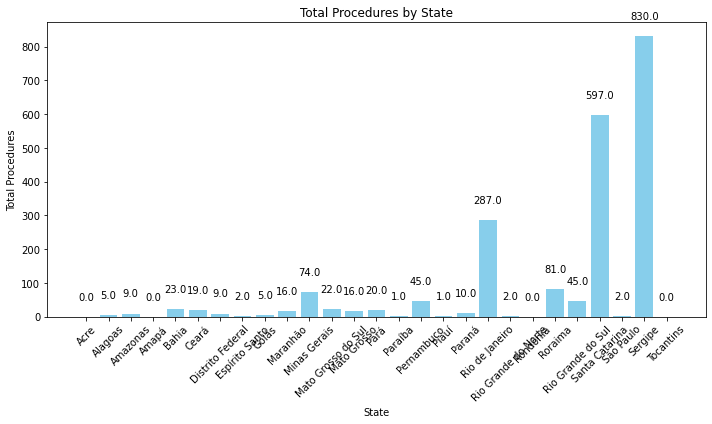

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(total_procedures_df['State'], total_procedures_df['Total Procedures'], color='skyblue')

plt.title('Total Procedures by State')
plt.xlabel('State')
plt.ylabel('Total Procedures')

# Adding the text on top of each bar to show the exact number
for i, val in enumerate(total_procedures_df['Total Procedures']):
    plt.text(i, val + 50, str(val), ha='center')

plt.xticks(rotation=45)  # Rotate state names for better readability if needed
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels if necessary
plt.show()

### Save as a csv file

In [24]:
row_max.to_csv('csv/max_states_tuber.csv', index=False)

### Transpose the data for the BI visualization

In [25]:
# Transpose the dataframe
transposed_data = filtered_df_drop_Total.set_index(['Code', 'Description']).transpose().reset_index()

# Renaming the 'index' column to 'State' for clarity after transposition
transposed_data.rename(columns={'index': 'State'}, inplace=True)

# Display the first few rows of the transposed dataframe to verify the change
transposed_data.head()

Code,State,0202090361,0301010072,0206020031,0301010048,0202080048,0301060096,0301060118,0301060029,0301100012,0412030128,0202020380,0412050170,0203010027,0212010034,0202010317,0202010473,0301100217,0202010651,0212010026,0202010600,0202010643,0202010694,0203020030,0202010465,0306020068,0202010635,0301060061,0202050017,0202010295,0204030153,0202010279,0202010201,0202010503,0202010678,0301010307,0202010422,0202030083,0301100284,0301010064,...,0202010708,0202010767,0211060151,0201010542,0301100039,0211060127,0202060250,0206010079,0301090033,0301010269,0301100195,0301050023,0803010010,0202080056,0211030040,0206030029,0202010538,0202010660,0202010724,0202010732,0202020029,0202020150,0202020304,0202020371,0202030300,0202030962,0202030970,0202031098,0202050068,0202060373,0202070271,0202080064,0205010032,0205020046,0205020054,0205020097,0205020100,0206010028,0206010036,0803010044
Description,,TESTE MOLECULAR PARA A DETECCAO DO COMPLEXO MYCOBACTERIUM TUBERCULOSIS,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,TOMOGRAFIA COMPUTADORIZADA DE TORAX,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO ESPECIALIZADA (EXCETO MEDICO),BACILOSCOPIA DIRETA P/ BAAR TUBERCULOSE (DIAGNOSTICA),ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDIMENTO,ACOLHIMENTO COM CLASSIFICACAO DE RISCO,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 HORAS EM ATENCAO ESPECIALIZADA,ADMINISTRACAO DE MEDICAMENTOS NA ATENCAO ESPECIALIZADA.,RETIRADA DE DRENO TUBULAR TORACICO,HEMOGRAMA COMPLETO,TORACOCENTESE/DRENAGEM DE PLEURA,EXAME CITOPATOLOGICO HORMONAL SERIADO (MINIMO 3 COLETAS),EXAMES PRE-TRANSFUSIONAIS II,DOSAGEM DE CREATININA,DOSAGEM DE GLICOSE,ADMINISTRACAO DE MEDICAMENTOS POR VIA ORAL,DOSAGEM DE TRANSAMINASE GLUTAMICO-PIRUVICA (TGP),EXAMES PRE-TRANSFUSIONAIS I,DOSAGEM DE POTASSIO,DOSAGEM DE TRANSAMINASE GLUTAMICO-OXALACETICA (TGO),DOSAGEM DE UREIA,EXAME ANATOMO-PATOLOGICO PARA CONGELAMENTO / PARAFINA POR PECA CIRURGICA OU POR BIOPSIA (EXCETO COL,DOSAGEM DE GAMA-GLUTAMIL-TRANSFERASE (GAMA GT),TRANSFUSAO DE CONCENTRADO DE HEMACIAS,DOSAGEM DE SODIO,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,"ANALISE DE CARACTERES FISICOS, ELEMENTOS E SEDIMENTO DA URINA",DOSAGEM DE COLESTEROL TOTAL,RADIOGRAFIA DE TORAX (PA E PERFIL),DOSAGEM DE COLESTEROL HDL,DOSAGEM DE BILIRRUBINA TOTAL E FRACOES,DOSAGEM DE HEMOGLOBINA GLICOSILADA,DOSAGEM DE TRIGLICERIDEOS,TELECONSULTA MEDICA NA ATENCAO ESPECIALIZADA,DOSAGEM DE FOSFATASE ALCALINA,DETERMINACAO QUANTITATIVA DE PROTEINA C REATIVA,CURATIVO SIMPLES,CONSULTA MEDICA EM ATENCAO PRIMARIA,...,DOSAGEM DE VITAMINA B12,DOSAGEM DE 25 HIDROXIVITAMINA D,POTENCIAL DE ACUIDADE VISUAL,BIOPSIA PERCUTANEA ORIENTADA POR TOMOGRAFIA COMPUTADORIZADA / ULTRASSONOGRAFIA / RESSONANCIA MAGNE,AFERICAO DE PRESSAO ARTERIAL,MAPEAMENTO DE RETINA,DOSAGEM DE HORMONIO TIREOESTIMULANTE (TSH),TOMOGRAFIA COMPUTADORIZADA DO CRANIO,AVALIACAO MULTIDIMENSIONAL DA PESSOA IDOSA,AVALIACAO DO CRESCIMENTO NA PUERICULTURA,ADMINISTRACAO DE MEDICAMENTOS POR VIA ENDOVENOSA,ASSISTENCIA DOMICILIAR POR EQUIPE MULTIPROFISSIONAL.,AJUDA DE CUSTO P/ ALIMENTACAO/PERNOITE DE PACIENTE,BACILOSCOPIA DIRETA P/ BAAR (HANSENIASE),AVALIACAO DE FUNCAO E MECANICA RESPIRATORIA,TOMOGRAFIA COMPUTADORIZADA DE ARTICULACOES DE MEMBRO INFERIOR,DOSAGEM DE LACTATO,DOSAGEM DE TRANSFERRINA,ELETROFORESE DE PROTEINAS,GASOMETRIA (PH PCO2 PO2 BICARBONATO AS2 (EXCESSO OU DEFICIT BASE ),CONTAGEM DE PLAQUETAS,DETERMINACAO DE VELOCIDADE DE HEMOSSEDIMENTACAO (VHS),DOSAGEM DE HEMOGLOBINA,HEMATOCRITO,PESQUISA DE ANTICORPOS ANTI-HIV-1 + HIV-2 (ELISA),PESQUISA DE ANTIGENO CARCINOEMBRIONARIO (CEA),PESQUISA DE ANTIGENO DE SUPERFICIE DO VIRUS DA HEPATITE B (HBSAG),TESTE TREPONEMICO P/ DETECCAO DE SIFILIS,DETERMINACAO DE OSMOLALIDADE,DOSAGEM DE TIROXINA (T4),DOSAGEM DE META-HEMOGLOBINA,BACILOSCOPIA DIRETA P/ BAAR TUBERCULOS (CONTROLE),ECOCARDIOGRAFIA TRANSTORACICA,ULTRASSONOGRAFIA DE ABDOMEN TOTAL,ULTRASSONOGRAFIA DE APARELHO URINARIO,ULTRASSONOGRAFIA MAMARIA BILATERAL,ULTRASSONOGRAFIA DE PROSTATA POR VIA ABDOMINAL,TOMOGRAFIA COMPUTADORI

In [26]:
transposed_data.to_csv('csv/transposed_data_tuber.csv', index=False)